## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Homework 5 Matplotlib_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "Resources/Homework 5 Matplotlib_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mouse=len(merge_df["Mouse ID"].unique())
print(f"There are {num_mouse} in the DataFrame")


There are 249 in the DataFrame


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicates[["Mouse ID","Timepoint"]]

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge=merge_df.loc[merge_df["Mouse ID"] != "g989"]


In [6]:
# Checking the number of mice in the clean DataFrame.
mouses=len(clean_merge["Mouse ID"].unique())
print(f"There are {mouses} mouses in the clean DataFrame")

There are 248 mouses in the clean DataFrame


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_merge_mean=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
clean_merge_median=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
clean_merge_var=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
clean_merge_sd=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
clean_merge_sem=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_table=pd.DataFrame({"Mean":clean_merge_mean,"Median":clean_merge_median,"Variance":clean_merge_var,"Standar Deviation":clean_merge_sd,"SEM":clean_merge_sem})
summary_table.head()

,Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summ_table=clean_merge.groupby("Drug Regimen").agg(
    Mean=("Tumor Volume (mm3)","mean"),
    Median=("Tumor Volume (mm3)","median"),
    Variance=("Tumor Volume (mm3)","var"),
    StandardDeviation = ("Tumor Volume (mm3)","std"),
    SEM = ("Tumor Volume (mm3)","sem"))

summ_table.head()



,Mean,Median,Variance,StandardDeviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

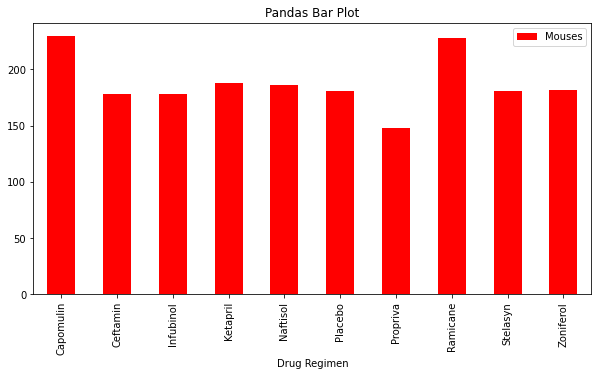

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
values=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
x_axis=np.arange(len(values))
values.plot(kind="bar",y=values,color="r",title="Pandas Bar Plot",figsize=(10,5), align="center", label="Mouses")
plt.legend(loc="best")

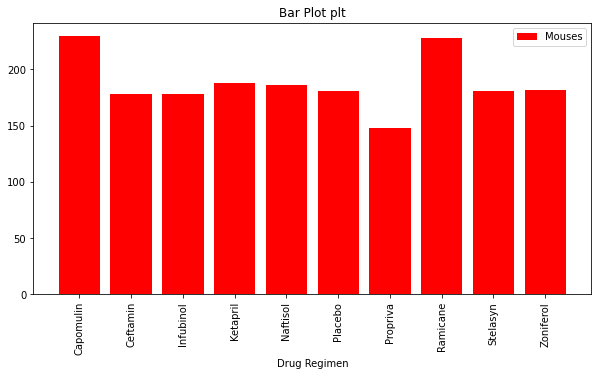

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
thick_locations=[]
tick_locations = [value for value in x_axis]


plt.figure(figsize=(10,5))
handle=plt.bar(x_axis,values,color="r",align="center",label="Mouses")
plt.xticks(tick_locations, clean_merge.groupby("Drug Regimen").count().index,rotation="vertical")

plt.xlabel("Drug Regimen")
plt.title("Bar Plot plt")
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Pie Chart pandas'}>

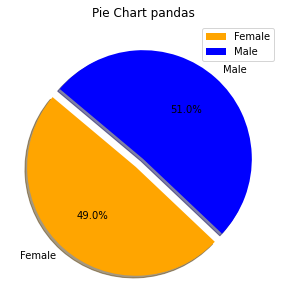

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_values=clean_merge.groupby("Sex")["Tumor Volume (mm3)"].count()
labels=["Female","Male"]
colors=["orange","blue"]
explode=(0.1,0)

pie_values.plot(kind="pie",autopct='%1.1f%%',explode=explode,startangle=140,figsize=(10,5),ylabel="",legend=True, colors=colors,shadow=True, title="Pie Chart pandas")

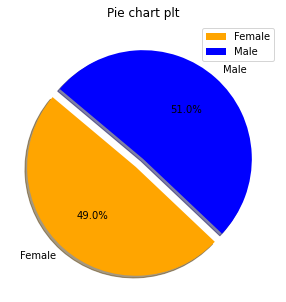

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,5))
plt.pie(pie_values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Pie chart plt")
plt.legend()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greates_timepoint=clean_merge.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

volume=pd.merge(clean_merge,greates_timepoint,on=["Mouse ID","Timepoint"])
volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=[]
for value in clean_merge["Drug Regimen"].unique():
    treatments.append(value)
    

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumor_val=volume["Tumor Volume (mm3)"].loc[volume["Drug Regimen"]==x]
    
    # add subset
    
    tumor_vol_data.append(tumor_val)
    
    # Determine outliers using upper and lower bounds
    
    quartiles=tumor_val.quantile([0.25,0.5,0.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    
    lb=lowerq-iqr
    ub=upperq+iqr
    
    print(f"The IQR for {value} is {iqr}")
    print(f"Any value under {lb} or over {ub} may be considered an outlier")
          
   
    
    
    

The IQR for Naftisol is 9.098536719999998
Any value under 22.461932830000002 or over 49.75754299 may be considered an outlier
The IQR for Naftisol is 7.781863460000004
Any value under 24.595493379999994 or over 47.941083760000005 may be considered an outlier
The IQR for Naftisol is 11.477135160000003
Any value under 42.571472529999994 or over 77.00287801 may be considered an outlier
The IQR for Naftisol is 15.191386480000006
Any value under 37.751515209999994 or over 83.32567465000001 may be considered an outlier
The IQR for Naftisol is 15.577752179999997
Any value under 33.14432567 or over 79.87758220999999 may be considered an outlier
The IQR for Naftisol is 16.62734878500001
Any value under 35.849246832499986 or over 85.73129318750001 may be considered an outlier
The IQR for Naftisol is 16.805853529999993
Any value under 33.18244893000001 or over 83.60000951999999 may be considered an outlier
The IQR for Naftisol is 13.152155339999993
Any value under 43.56794011000001 or over 83.024

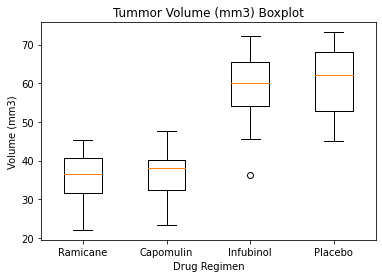

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


fig1, ax1 = plt.subplots()
ax1.set_title('Tummor Volume (mm3) Boxplot')
ax1.set_ylabel('Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data[0:4])
ax1.set_xticklabels(treatments[0:4])

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

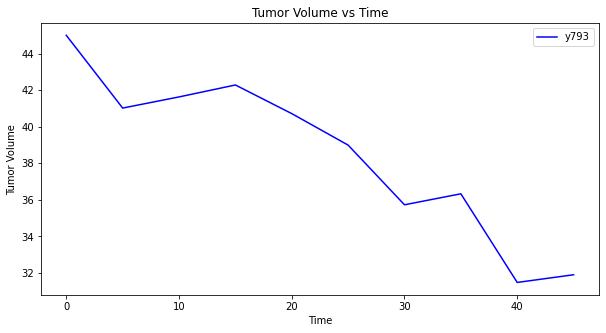

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
random.seed(42)
capomulin_df=clean_merge.loc[clean_merge["Drug Regimen"]=="Capomulin"]
sample_mouse=capomulin_df["Mouse ID"].sample(1).reset_index()
mouse_sample_df=capomulin_df.loc[capomulin_df["Mouse ID"]==sample_mouse["Mouse ID"][0]]

mouse_sample_df.plot(x="Timepoint",y="Tumor Volume (mm3)",title="Tumor Volume vs Time",color="b",label=sample_mouse["Mouse ID"][0],figsize=(10,5))
plt.xlabel("Time")
plt.ylabel("Tumor Volume")

Text(0, 0.5, 'Tumor Volume (mm3)')

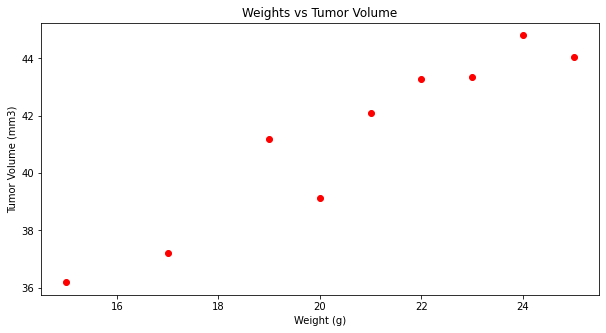

In [47]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight_df=capomulin_df.groupby("Weight (g)").mean()
weights=[]
for weight in weight_df.index:
    weights.append(weight)


plt.figure(figsize=(10,5))
plt.scatter(weights,weight_df["Tumor Volume (mm3)"],color="r")
plt.title("Weights vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")



## Correlation and Regression

The r-squared is: 0.9034966277438606


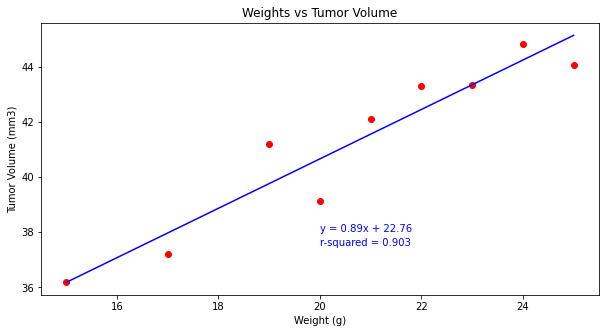

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values=[]
for value in weights:
    x_values.append(float(value))
y_values = weight_df["Tumor Volume (mm3)"]
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values,color="r")
plt.title("Weights vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.asarray(x_values) * slope + intercept
r_values=[]
for value in regress_values:
    r_values.append(value)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(20,38),fontsize=10,color="blue")
plt.annotate("r-squared = "+str(round(rvalue**2,3)),(20,37.5),fontsize=10,color="blue")

print(f"The r-squared is: {rvalue**2}")
